TRABAJO FIN DE GRADO- ALEJANDRO TAPIA ESCUDERO

---



*Influencia del análisis de datos y los modelos predictivos en un Sistema de Detección de Intrusos (IDS) con tráfico de red Darknet.*

ACERCA DEL CONJUNTO DE DATOS

---


Los datos de esta BBDD está relacionados con conexiones malignas (VPN y TOR) y conexiones benignas (Non-VPN y Non-TOR)

**1ª FASE: INGENIERIA DEL DATO**

---



En esta primera fase me dispongo a realizar un Análisis Exploratorio de los datos (EDA) sobre la base de datos "Darknet". En primer lugar cargaré los datos, y después eliminaré los datos NaN, Infinitos, y demás variables que no vea interesantes o necesarias para el desarrollo del estudio del TFG. En esta fase finalmente separaremos el conjunto de los datos en train y test para tener preparado el conjunto de datos para la elaboración de los modelos predictivos

**1. ANALISIS EXPLORATORIO DE DATOS (EDA)**

1.1. Importamos librerías

In [1]:
import numpy as np #Algebra
import pandas as pd #Procesamiento de bases de datos (dataframes)
import matplotlib.pyplot as plt #Gráficos
import seaborn as sns #Gráficos
sns.set()
plt.rcParams["figure.figsize"] = (14,4) #tamaño gráficos

In [2]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder #Tranformacíon variables categóricas (encoding: pasar categorias a números)
from sklearn.preprocessing import MinMaxScaler, StandardScaler #Tranformacíon variables numéricas (normalización)
from sklearn import metrics
from sklearn.model_selection import train_test_split #separación train y test
from sklearn.preprocessing import OneHotEncoder #Tranformacíon variables categóricas nominales

1.2. Importamos la base de datos

In [3]:
#leemos el dataset
darknet = pd.read_csv("Darknet.CSV", low_memory=False, error_bad_lines=False)

<ipython-input-3-579fddfc5027>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  darknet = pd.read_csv("Darknet.CSV", low_memory=False, error_bad_lines=False)
b'Skipping line 328: expected 85 fields, saw 125\n'


In [4]:
#tamaño del dataset
print('Tamaño de la BBDD: ', darknet.shape)

Tamaño de la BBDD:  (141530, 85)


In [5]:
#Observamos los datos
darknet.head()


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437765e+15,3.117718e+06,1.437765e+15,1.437765e+15,Non-Tor,AUDIO-STREAMING


GRAFICOS INTERESANTES

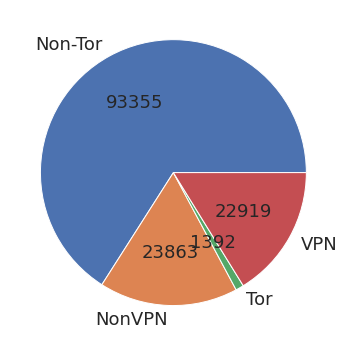

In [6]:
df = darknet.groupby("Label").count()
fig, ax = plt.subplots(figsize=(5,5))

df.plot(y="Label.1", legend=None, ax=ax, shadow=False, kind="pie", fontsize=18,autopct=lambda x: int(df["Label.1"].values.sum()*x/100))
plt.ylabel("")
plt.tight_layout()
plt.show()

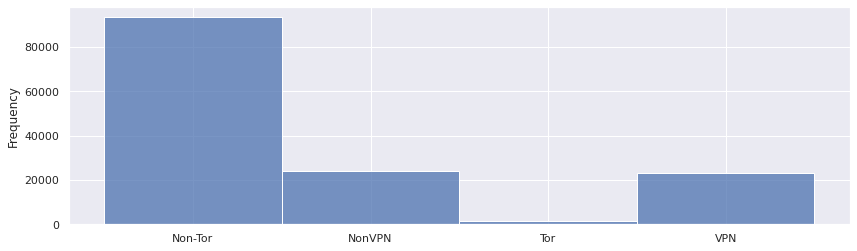

In [7]:
sns.histplot(data=darknet, x="Label", stat="frequency")
plt.xlabel('')
plt.show()

1.3. Comprobamos si hay valores faltantes 

In [8]:
darknet.isnull().sum()

Flow ID     0
Src IP      0
Src Port    0
Dst IP      0
Dst Port    0
           ..
Idle Std    0
Idle Max    0
Idle Min    0
Label       0
Label.1     0
Length: 85, dtype: int64

No hay valores nulos en casi ninguna variable, solo se han detectado en la variable "Flow Bytes/s" 

In [9]:
is_na_cols = darknet.columns[darknet.isna().sum() > 0]
darknet.isna().sum()[is_na_cols] 

Flow Bytes/s    47
dtype: int64

In [10]:
darknet["Flow Bytes/s"].isnull().sum()

47

In [11]:
darknet = darknet.dropna()
darknet.isna().sum()[is_na_cols] 

Flow Bytes/s    0
dtype: int64

1.4. Comprobamos valores infinitos

Como los valores infinitos se identifican como "Infinity" hay que cambiarles su identificacion, para que numpy pueda reconocerlo

In [12]:
darknet = darknet.replace('Infinity', np.inf)

In [13]:
darknet.isin([np.inf, -np.inf])

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141525,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
141526,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
141527,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
141528,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
#Cambiamos los valores infinitos a NaN para eliminarlos todos
darknet = darknet.replace(np.inf, np.NaN)

1.5. Eliminamos valores infinitos y nulos

In [15]:
darknet.dropna()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437765e+15,3.117718e+06,1.437765e+15,1.437765e+15,Non-Tor,AUDIO-STREAMING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141525,10.8.8.246-224.0.0.252-55219-5355-17,10.8.8.246,55219,224.0.0.252,5355,17,22/05/2015 01:55:03 PM,411806,2,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP
141526,10.8.8.246-224.0.0.252-64207-5355-17,10.8.8.246,64207,224.0.0.252,5355,17,22/05/2015 02:09:05 PM,411574,2,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP
141527,10.8.8.246-224.0.0.252-61115-5355-17,10.8.8.246,61115,224.0.0.252,5355,17,22/05/2015 02:19:31 PM,422299,2,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP
141528,10.8.8.246-224.0.0.252-64790-5355-17,10.8.8.246,64790,224.0.0.252,5355,17,22/05/2015 02:29:55 PM,411855,2,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP


2. Procesamiento de datos

2.1. Agrupar Variable Objetivo en: 

> Conexiones Benignas(Non-VPN y Non-Tor)


> Conexiones Darknet (VPN y Tor) 







Esta agrupación se debe a que vamos a tratar ambas conexiones por igual, no importa si es una conexion u otra, puesto que queremos detectar y cortar ambas. Así será mas sencillo de tratar estos datos. 

In [16]:
darknet['Label'].loc[(darknet['Label'] == 'Non-Tor') | (darknet['Label'] == 'NonVPN')] = 'Benign'
darknet['Label'].loc[(darknet['Label'] == 'Tor') | (darknet['Label'] == 'VPN')] = 'Darknet'

print(darknet['Label'].value_counts())

Benign     117172
Darknet     24311
Name: Label, dtype: int64


<ipython-input-16-dc6f58615c7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  darknet['Label'].loc[(darknet['Label'] == 'Non-Tor') | (darknet['Label'] == 'NonVPN')] = 'Benign'
<ipython-input-16-dc6f58615c7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  darknet['Label'].loc[(darknet['Label'] == 'Tor') | (darknet['Label'] == 'VPN')] = 'Darknet'


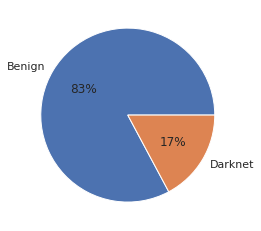

In [17]:
labels = ['Benign', 'Darknet']
plt.pie(darknet['Label'].value_counts(), labels = labels , autopct = '%0.0f%%')
plt.show()

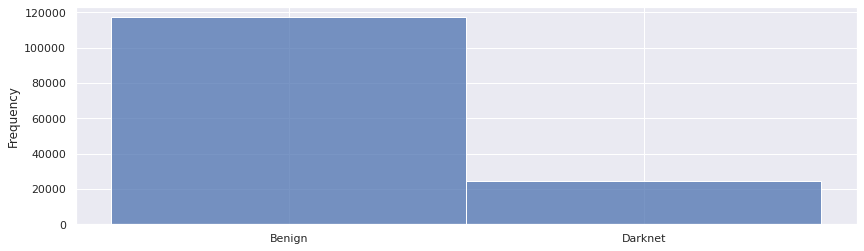

In [18]:
sns.histplot(data=darknet['Label'], stat="frequency")
plt.xlabel('')
plt.show()

2.2. Variable Timestamp

> Como aparece la fecha completa, realmente no nos aporta información relevante, por ello he decidido extraer el valor de la hora, que es un valor numérico y a la hora de los modelos predicictivos será de más ayuda.

> Creamos una nueva variable Hour, hora extraida de la variable Timestamp y después borraremos la variable Timestamp. 


In [19]:
#Creamos variable Hora en el dataset

horas = []
for timestamp in darknet['Timestamp']:
    hora = int(timestamp.split()[1].split(':')[0])
    horas.append(hora)
darknet['hour'] = horas
print(darknet[['Timestamp', 'hour']][:5])


                Timestamp  hour
0  24/07/2015 04:09:48 PM     4
1  24/07/2015 04:09:48 PM     4
2  24/07/2015 04:09:48 PM     4
3  24/07/2015 04:09:48 PM     4
4  24/07/2015 04:09:45 PM     4


<ipython-input-20-90dc88648cfa>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(plot_graph_darknet['hour'], shade=True)
<ipython-input-20-90dc88648cfa>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(plot_graph_benign['hour'], shade=True)


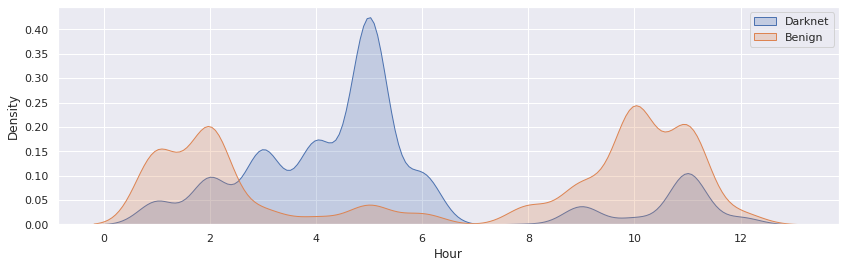

In [20]:
plot_graph_darknet = darknet[darknet['Label'] == "Darknet"]
plot_graph_benign = darknet[darknet['Label'] == "Benign"]
sns.kdeplot(plot_graph_darknet['hour'], shade=True)
sns.kdeplot(plot_graph_benign['hour'], shade=True)
plt.xlabel("Hour")
plt.ylabel("Density")
plt.legend(['Darknet', 'Benign'])
plt.show()

In [21]:
#Eliminamos variable Timestamp
del darknet['Timestamp']

print(darknet.shape)


(141483, 85)


2.3. Nueva variable grams de las variables "Src IP" y "Dst IP" (creamos 3 subcategorías de dichas variables)

Para que el modelo tenga información relevante sobre las direcciones IP Fuente y Destino, hay que separar dichas direcciones en 3 grupos, los 3 primeros rangos. De aqui podremos extraer información sobre si es una direccion IP privada o pública, dinámica o estática, el sitio web, etc. 

In [22]:
#Creamos la funcion create_grams, definicion las 3 separaciones que vamos a realizar con split
def create_grams(ip):
    parts = ip.split('.') #definimos el separador con el .
    one_gram = parts[0] #primeros 3 digitos
    two_gram = one_gram + " " + parts[1]
    three_gram = two_gram + " " + parts[2]
    return one_gram, two_gram, three_gram

In [23]:
#Creamos una lista para cada subdivision(3), para cada variable (Src y Dst)
src_one_gram = []
src_two_gram = []
src_three_gram = []
dst_one_gram = []
dst_two_gram = []
dst_three_gram = []

#Bucle para recorrer ambas variables, aplicando la funcion create_grams()

for src_ip, dst_ip in zip(darknet['Src IP'], darknet['Dst IP']): 
    src_one, src_two, src_three = create_grams(src_ip)
    src_one_gram.append(src_one)
    src_two_gram.append(src_two)
    src_three_gram.append(src_three)
    dst_one, dst_two, dst_three = create_grams(dst_ip)
    dst_one_gram.append(dst_one)
    dst_two_gram.append(dst_two)
    dst_three_gram.append(dst_three)

darknet['src_ip_1gram'] = src_one_gram
darknet['src_ip_2gram'] = src_two_gram
darknet['src_ip_3gram'] = src_three_gram

darknet['dst_ip_1gram'] = dst_one_gram
darknet['dst_ip_2gram'] = dst_two_gram
darknet['dst_ip_3gram'] = dst_three_gram

In [24]:
#Comprobamos que esté correcto
print(darknet[['Src IP','src_ip_1gram','src_ip_2gram','src_ip_3gram']][150:155])
print(darknet[['Dst IP','dst_ip_1gram','dst_ip_2gram','dst_ip_3gram']][15:20])

            Src IP src_ip_1gram src_ip_2gram src_ip_3gram
150  74.125.28.189           74       74 125    74 125 28
151  10.152.152.11           10       10 152   10 152 152
152  10.152.152.11           10       10 152   10 152 152
153  10.152.152.11           10       10 152   10 152 152
154  10.152.152.11           10       10 152   10 152 152
            Dst IP dst_ip_1gram dst_ip_2gram dst_ip_3gram
15   216.58.220.99          216       216 58   216 58 220
16  173.194.65.149          173      173 194   173 194 65
17  173.194.65.102          173      173 194   173 194 65
18  173.194.65.101          173      173 194   173 194 65
19  173.194.65.138          173      173 194   173 194 65


2.4. GRAFICOS **TIPOS DE TRAFICO**(y_2)

In [25]:
darknet['Label.1'].unique()

array(['AUDIO-STREAMING', 'Browsing', 'Chat', 'Email', 'File-Transfer',
       'File-transfer', 'P2P', 'Video-Streaming', 'Audio-Streaming',
       'Video-streaming', 'VOIP'], dtype=object)

Vemos que hay 3 valores repetidos:

> Audio-Streaming/AUDIO-STREAMING


> File-Transfer/File-transfer


> Video-Streaming/Video-streaming



In [26]:
#Corregimos los valores duplicados de esta variable
darknet['Label.1'].loc[darknet['Label.1'] == 'AUDIO-STREAMING'] = 'Audio-Streaming'
darknet['Label.1'].loc[darknet['Label.1'] == 'File-transfer'] = 'File-Transfer'
darknet['Label.1'].loc[darknet['Label.1'] == 'Video-streaming'] = 'Video-Streaming'


<ipython-input-26-ec7f1aa36e55>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  darknet['Label.1'].loc[darknet['Label.1'] == 'AUDIO-STREAMING'] = 'Audio-Streaming'
<ipython-input-26-ec7f1aa36e55>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  darknet['Label.1'].loc[darknet['Label.1'] == 'File-transfer'] = 'File-Transfer'
<ipython-input-26-ec7f1aa36e55>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  darknet['Label.1'].loc[darknet['

EN LA **DARKNET** 

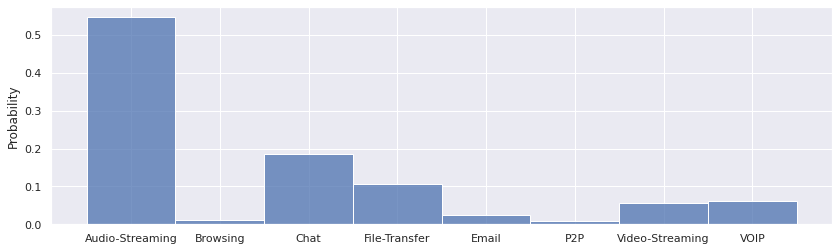

In [27]:
sns.histplot(data=darknet[darknet['Label'] == 'Darknet'], x='Label.1', stat='probability')
plt.xlabel('')
plt.show()

**FUERA** DE LA DARKNET (BENIGN)

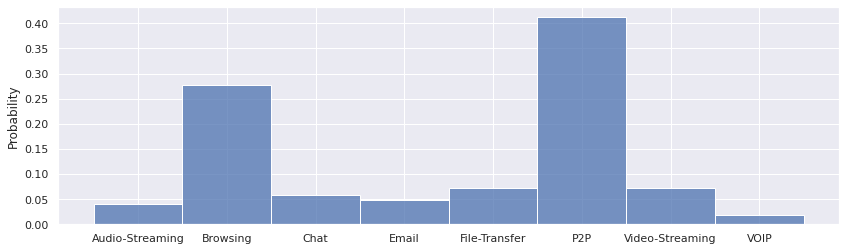

In [28]:
sns.histplot(data=darknet[darknet['Label'] == 'Benign'], x='Label.1', stat='probability')
plt.xlabel('')
plt.show()

2.5. Eliminar variables irrelevantes

-Flow ID

> No aporta información relevante al modelo, simplemente es una ID de la conexión



In [29]:
del darknet['Flow ID']

In [30]:
print(darknet.shape)

(141483, 90)


-Src IP

Como ya hemos extraido su información en otras 3 variables separadas por el rango de la IP, que nos aportan mayor información, podemos eliminarla.

In [31]:
del darknet['Src IP']

In [32]:
print(darknet.shape)

(141483, 89)


-Dst IP

Como nos ocurre con la variable Src IP, hemos extraido su información para dividir las IP en rangos, esta variable ya no nos aporta información relevante. 

In [33]:
del darknet['Dst IP']

In [34]:
print(darknet.shape)

(141483, 88)


-Label.1

Como finalmente vamos a aplicar los modelos predictivos unicamente para detectar si el tráfico de la red es de la Darknet o no, los tipos de tráfico no se van a utilizar para modelizar posteriormente, por lo que podemso prescindir de esta variable

In [35]:
del darknet['Label.1']

In [36]:
print(darknet.shape)

(141483, 87)


2.6. Convertimos los datos a tipo flotante para los modelos

In [37]:
real_columns = ['Flow Duration', 'Total Fwd Packet', 'Total Bwd packets', 'Total Length of Fwd Packet', 'Total Length of Bwd Packet', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Fwd Segment Size Avg', 'Bwd Segment Size Avg', 'Fwd Bytes/Bulk Avg', 'Fwd Packet/Bulk Avg', 'Fwd Bulk Rate Avg', 'Bwd Bytes/Bulk Avg', 'Bwd Packet/Bulk Avg', 'Bwd Bulk Rate Avg', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'FWD Init Win Bytes', 'Bwd Init Win Bytes', 'Fwd Act Data Pkts', 'Fwd Seg Size Min']
print(real_columns)

['Flow Duration', 'Total Fwd Packet', 'Total Bwd packets', 'Total Length of Fwd Packet', 'Total Length of Bwd Packet', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio', 'Average

In [38]:
darknet[real_columns] = darknet[real_columns].astype(np.float64)

In [39]:
cols = np.concatenate((darknet.columns[81:], darknet.columns[:81]))
darknet = darknet[cols]
darknet.columns

Index(['src_ip_1gram', 'src_ip_2gram', 'src_ip_3gram', 'dst_ip_1gram',
       'dst_ip_2gram', 'dst_ip_3gram', 'Src Port', 'Dst Port', 'Protocol',
       'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'P

Hash encoding a las variables creadas de las direcciones IP


In [40]:
hash_enc_cols = ['src_ip_1gram', 'src_ip_2gram', 'src_ip_3gram', 'dst_ip_1gram',
 'dst_ip_2gram', 'dst_ip_3gram']
print(hash_enc_cols)

['src_ip_1gram', 'src_ip_2gram', 'src_ip_3gram', 'dst_ip_1gram', 'dst_ip_2gram', 'dst_ip_3gram']


In [41]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.2 MB/s eta 0:00:00


In [42]:
from category_encoders.hashing import HashingEncoder
hash_enc = HashingEncoder(cols=hash_enc_cols, n_components=100).fit(darknet)
darknet = hash_enc.transform(darknet)
darknet.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,hour
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Benign,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Benign,4
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Benign,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Benign,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.437765e+15,3.117718e+06,1.437765e+15,1.437765e+15,Benign,4


Estandarizo los valores de las variables, para que sea más sencillo de modelizar los datos

In [43]:
scaler = StandardScaler().fit(darknet[real_columns])
darknet[real_columns] = scaler.transform(darknet[real_columns])
darknet[real_columns].head()

,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min
0,-0.546503,-0.063838,-0.044949,-0.034644,-0.028574,-0.321757,-0.498857,-0.316449,-0.379414,-0.292364,...,-0.052228,-0.043209,-0.63408,-0.313202,0.0,-0.413042,-0.345299,-0.095140,-0.061219,0.589641
1,-0.546498,-0.063838,-0.044949,-0.034644,-0.028574,-0.321757,-0.498857,-0.316449,-0.379414,-0.292364,...,-0.052228,-0.043209,-0.63408,-0.313202,0.0,-0.413042,-0.335700,-0.095140,-0.061219,0.589641
2,-0.546497,-0.063838,-0.044949,-0.034644,-0.028574,-0.321757,-0.498857,-0.316449,-0.379414,-0.292364,...,-0.052228,-0.043209,-0.63408,-0.313202,0.0,-0.413042,-0.329435,-0.095140,-0.061219,0.589641
3,-0.546499,-0.063838,-0.044949,-0.034644,-0.028574,-0.321757,-0.498857,-0.316449,-0.379414,-0.292364,...,-0.052228,-0.043209,-0.63408,-0.313202,0.0,-0.413042,-0.333578,-0.095140,-0.061219,0.589641
4,-0.263579,0.184196,0.071742,-0.014800,-0.027116,-0.120072,-0.498857,0.179864,-0.247301,0.340536,...,0.164344,-0.036900,-0.63408,0.158681,0.0,-0.368395,-0.396832,0.073136,0.305789,0.589641


In [44]:
darknet = darknet.dropna()
print(darknet[darknet.columns[darknet.isna().sum()>0]].isna().sum())

Series([], dtype: float64)


2.7. Tipología de los datos

In [45]:
darknet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141481 entries, 0 to 141529
Columns: 181 entries, col_0 to hour
dtypes: float64(72), int64(108), object(1)
memory usage: 196.5+ MB


In [46]:
# analizamos la cantidad de observaciones por cada valor observado en cada columna
for col in darknet.columns.tolist():
    print(f"\033[1m{col} \n{20 * '-'}\033[0m")
    print(darknet[col].value_counts(), '\n')

col_0 
--------------------
0    137428
1      4053
Name: col_0, dtype: int64 

col_1 
--------------------
0    138604
1      2439
2       438
Name: col_1, dtype: int64 

col_2 
--------------------
0    139577
1      1887
2        17
Name: col_2, dtype: int64 

col_3 
--------------------
0    136533
1      4873
2        75
Name: col_3, dtype: int64 

col_4 
--------------------
0    130120
1     11361
Name: col_4, dtype: int64 

col_5 
--------------------
0    139865
1      1615
2         1
Name: col_5, dtype: int64 

col_6 
--------------------
0    139032
1      2448
2         1
Name: col_6, dtype: int64 

col_7 
--------------------
0    138847
1      2540
2        94
Name: col_7, dtype: int64 

col_8 
--------------------
0    138906
1      2565
2        10
Name: col_8, dtype: int64 

col_9 
--------------------
0    115546
1     23796
2      1903
3       236
Name: col_9, dtype: int64 

col_10 
--------------------
0    139707
1      1692
2        82
Name: col_10, dtype: int64 

2.8. Resumen estadístico

In [47]:
print(darknet.describe(include='all', percentiles=[]))

                col_0          col_1          col_2          col_3  \
count   141481.000000  141481.000000  141481.000000  141481.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         0.028647       0.023431       0.013578       0.035503   
std          0.166813       0.170510       0.116764       0.187891   
min          0.000000       0.000000       0.000000       0.000000   
50%          0.000000       0.000000       0.000000       0.000000   
max          1.000000       2.000000       2.000000       2.000000   

                col_4          col_5          col_6          col_7  \
count   141481.000000  141481.000000  141481.000000  141481.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              N

3. Separación de los datos en train y test

In [48]:
#separamos el conjunto de datos en train(80%) y test(20%)
train, test = train_test_split(darknet, test_size = 0.2, shuffle = True)

In [49]:
#comprobamos el tamaño de cada conjunto
print('Train data size: ', train.shape)
print('Test data size: ', test.shape)

Train data size:  (113184, 181)
Test data size:  (28297, 181)


In [50]:
#Observamos el nombre de todas las variables
print(train.columns.tolist())

['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8', 'col_9', 'col_10', 'col_11', 'col_12', 'col_13', 'col_14', 'col_15', 'col_16', 'col_17', 'col_18', 'col_19', 'col_20', 'col_21', 'col_22', 'col_23', 'col_24', 'col_25', 'col_26', 'col_27', 'col_28', 'col_29', 'col_30', 'col_31', 'col_32', 'col_33', 'col_34', 'col_35', 'col_36', 'col_37', 'col_38', 'col_39', 'col_40', 'col_41', 'col_42', 'col_43', 'col_44', 'col_45', 'col_46', 'col_47', 'col_48', 'col_49', 'col_50', 'col_51', 'col_52', 'col_53', 'col_54', 'col_55', 'col_56', 'col_57', 'col_58', 'col_59', 'col_60', 'col_61', 'col_62', 'col_63', 'col_64', 'col_65', 'col_66', 'col_67', 'col_68', 'col_69', 'col_70', 'col_71', 'col_72', 'col_73', 'col_74', 'col_75', 'col_76', 'col_77', 'col_78', 'col_79', 'col_80', 'col_81', 'col_82', 'col_83', 'col_84', 'col_85', 'col_86', 'col_87', 'col_88', 'col_89', 'col_90', 'col_91', 'col_92', 'col_93', 'col_94', 'col_95', 'col_96', 'col_97', 'col_98', 'col_99', 'Src Port

3.1. Separo la target (Variable Objetivo) 

In [51]:
x_train = train[['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8', 'col_9', 'col_10', 'col_11', 'col_12', 'col_13', 'col_14', 'col_15', 'col_16', 'col_17', 'col_18', 'col_19', 'col_20', 'col_21', 'col_22', 'col_23', 'col_24', 'col_25', 'col_26', 'col_27', 'col_28', 'col_29', 'col_30', 'col_31', 'col_32', 'col_33', 'col_34', 'col_35', 'col_36', 'col_37', 'col_38', 'col_39', 'col_40', 'col_41', 'col_42', 'col_43', 'col_44', 'col_45', 'col_46', 'col_47', 'col_48', 'col_49', 'col_50', 'col_51', 'col_52', 'col_53', 'col_54', 'col_55', 'col_56', 'col_57', 'col_58', 'col_59', 'col_60', 'col_61', 'col_62', 'col_63', 'col_64', 'col_65', 'col_66', 'col_67', 'col_68', 'col_69', 'col_70', 'col_71', 'col_72', 'col_73', 'col_74', 'col_75', 'col_76', 'col_77', 'col_78', 'col_79', 'col_80', 'col_81', 'col_82', 'col_83', 'col_84', 'col_85', 'col_86', 'col_87', 'col_88', 'col_89', 'col_90', 'col_91', 'col_92', 'col_93', 'col_94', 'col_95', 'col_96', 'col_97', 'col_98', 'col_99', 'Src Port', 'Dst Port', 'Protocol', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets', 'Total Length of Fwd Packet', 'Total Length of Bwd Packet', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Fwd Segment Size Avg', 'Bwd Segment Size Avg', 'Fwd Bytes/Bulk Avg', 'Fwd Packet/Bulk Avg', 'Fwd Bulk Rate Avg', 'Bwd Bytes/Bulk Avg', 'Bwd Packet/Bulk Avg', 'Bwd Bulk Rate Avg', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'FWD Init Win Bytes', 'Bwd Init Win Bytes', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min', 'hour']]
y_train = train['Label']
x_test = test[['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8', 'col_9', 'col_10', 'col_11', 'col_12', 'col_13', 'col_14', 'col_15', 'col_16', 'col_17', 'col_18', 'col_19', 'col_20', 'col_21', 'col_22', 'col_23', 'col_24', 'col_25', 'col_26', 'col_27', 'col_28', 'col_29', 'col_30', 'col_31', 'col_32', 'col_33', 'col_34', 'col_35', 'col_36', 'col_37', 'col_38', 'col_39', 'col_40', 'col_41', 'col_42', 'col_43', 'col_44', 'col_45', 'col_46', 'col_47', 'col_48', 'col_49', 'col_50', 'col_51', 'col_52', 'col_53', 'col_54', 'col_55', 'col_56', 'col_57', 'col_58', 'col_59', 'col_60', 'col_61', 'col_62', 'col_63', 'col_64', 'col_65', 'col_66', 'col_67', 'col_68', 'col_69', 'col_70', 'col_71', 'col_72', 'col_73', 'col_74', 'col_75', 'col_76', 'col_77', 'col_78', 'col_79', 'col_80', 'col_81', 'col_82', 'col_83', 'col_84', 'col_85', 'col_86', 'col_87', 'col_88', 'col_89', 'col_90', 'col_91', 'col_92', 'col_93', 'col_94', 'col_95', 'col_96', 'col_97', 'col_98', 'col_99', 'Src Port', 'Dst Port', 'Protocol', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets', 'Total Length of Fwd Packet', 'Total Length of Bwd Packet', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Fwd Segment Size Avg', 'Bwd Segment Size Avg', 'Fwd Bytes/Bulk Avg', 'Fwd Packet/Bulk Avg', 'Fwd Bulk Rate Avg', 'Bwd Bytes/Bulk Avg', 'Bwd Packet/Bulk Avg', 'Bwd Bulk Rate Avg', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'FWD Init Win Bytes', 'Bwd Init Win Bytes', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min', 'hour']]
y_test = test['Label']

In [52]:
print(y_train.value_counts(), '\n')
print(y_test.value_counts(), '\n')

Benign     93773
Darknet    19411
Name: Label, dtype: int64 

Benign     23397
Darknet     4900
Name: Label, dtype: int64 



3.1. Convertimos los valores de la y en 0 y 1
COMO EL OBJETIVO ES DETECTAR TRAFICO DARKNET:


> Benign = 0

> **Darknet = 1**


In [53]:
#Convertimos los datos de la variable dependiente y en valores 0 o 1
y_train.loc[y_train == 'Benign'] = 0 
y_train.loc[y_train == 'Darknet'] = 1

print(y_train.value_counts())

0    93773
1    19411
Name: Label, dtype: int64


<ipython-input-53-9c98ef5640ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train.loc[y_train == 'Benign'] = 0
<ipython-input-53-9c98ef5640ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train.loc[y_train == 'Darknet'] = 1


In [54]:
#Hacemos lo mismo con test 
y_test.loc[y_test == 'Benign'] = 0 
y_test.loc[y_test == 'Darknet'] = 1

print(y_test.value_counts())

0    23397
1     4900
Name: Label, dtype: int64


<ipython-input-54-a0ff17199a8f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test.loc[y_test == 'Benign'] = 0
<ipython-input-54-a0ff17199a8f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test.loc[y_test == 'Darknet'] = 1




---



**2ª FASE: DATA ANALYTICS**

---


En esta 2ª fase del análisis del dato, voy a realizar en primer lugar una red neuronal, en concreto una deep neural network, con distintas configuraciones e implementaciones para buscar la mejor evaluación de la red neuronal, ya que buscamos una red neuronal muy precisa para detectar las conexiones de la Darknet. 
Después se aplicarán otros modelos de Machine Learning como: Logistic Regression, Decision Trees, Random Forest, KNN y una Red Neuronal para comparar estos 5 modelos utilizados y utilizar el más preciso. 

In [55]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

Como tenemos un desbalanceo de datos, aplicamos un SMOTE al conjunto de entrenamiento 

In [56]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=45)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

**LOGISTIC REGRESSION**


In [57]:
from sklearn.linear_model import LogisticRegression #Modelo de Regresión Logística
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, classification_report, f1_score, roc_auc_score

# Creamos el modelo de regresion logistica
lr = LogisticRegression(fit_intercept=True, penalty='l2', dual=False, intercept_scaling=1, tol=1e-5, C=1.0, 
                        solver='lbfgs', max_iter=75, multi_class='auto', warm_start=True)

# Entrenamos el modelo
lr.fit(x_train_smote, y_train_smote)

# Predecimos el modelo
y_pred_test_lr = lr.predict(x_test)

Medidas de error/precisión

In [58]:
accuracy_test = accuracy_score(y_test, y_pred_test_lr)
precision_test = precision_score(y_test, y_pred_test_lr)
recall_test = recall_score(y_test, y_pred_test_lr)
f1_test = f1_score(y_test, y_pred_test_lr)
roc_auc_test = roc_auc_score(y_test, y_pred_test_lr)

print("Accuracy: {:.3f}".format(accuracy_test))
print("Precision: {:.3f}".format(precision_test))
print("Recall: {:.3f}".format(recall_test))
print("F1-score: {:.3f}".format(f1_test))
print("ROC AUC: {:.3f}".format(roc_auc_test))
print(classification_report(y_pred_test_lr, y_test))
cm_lr = confusion_matrix(y_test, y_pred_test_lr)

Accuracy: 0.696
Precision: 0.326
Recall: 0.705
F1-score: 0.446
ROC AUC: 0.700
              precision    recall  f1-score   support

           0       0.69      0.92      0.79     17700
           1       0.70      0.33      0.45     10597

    accuracy                           0.70     28297
   macro avg       0.70      0.62      0.62     28297
weighted avg       0.70      0.70      0.66     28297



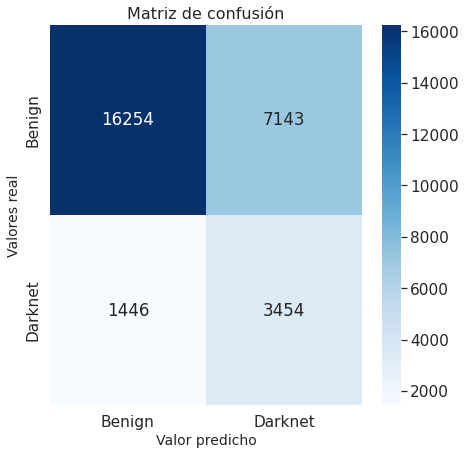

In [59]:
#MATRIZ DE CONFUSION
# Configuramos el estilo de la tabla
sns.set(style='whitegrid', font_scale=1.4)

# Creamos la tabla con colores
fig, ax = plt.subplots(figsize=(7, 7))
ax = sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='g', cbar=True)

# Configuramos los títulos y etiquetas
ax.set_xlabel('Valor predicho', fontsize=14)
ax.set_ylabel('Valores real', fontsize=14)
ax.set_title('Matriz de confusión', fontsize=16)
ax.xaxis.set_ticklabels(['Benign', 'Darknet'])
ax.yaxis.set_ticklabels(['Benign', 'Darknet'])

plt.show()



---



**DECISION TREES**

In [60]:
from sklearn.tree import DecisionTreeClassifier
# ARBOL DE DECISION

# Creamos el arbol de decision
tree = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=50,
                              min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                              max_features=None, random_state=43, max_leaf_nodes=None, 
                              min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

# Entrenamos el modelo
tree.fit(x_train_smote, y_train_smote)

# Predecimos el modelo
y_pred_test_tree = tree.predict(x_test)

Medidas de error/precisión

In [61]:
accuracy_test = accuracy_score(y_test, y_pred_test_tree)
precision_test = precision_score(y_test, y_pred_test_tree)
recall_test = recall_score(y_test, y_pred_test_tree)
f1_test = f1_score(y_test, y_pred_test_tree)
roc_auc_test = roc_auc_score(y_test, y_pred_test_tree)

print("Accuracy: {:.3f}".format(accuracy_test))
print("Precision: {:.3f}".format(precision_test))
print("Recall: {:.3f}".format(recall_test))
print("F1-score: {:.3f}".format(f1_test))
print("ROC AUC: {:.3f}".format(roc_auc_test))
print(classification_report(y_pred_test_tree, y_test))
cm_tree = confusion_matrix(y_test, y_pred_test_tree)

Accuracy: 0.999
Precision: 0.998
Recall: 0.998
F1-score: 0.998
ROC AUC: 0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23396
           1       1.00      1.00      1.00      4901

    accuracy                           1.00     28297
   macro avg       1.00      1.00      1.00     28297
weighted avg       1.00      1.00      1.00     28297



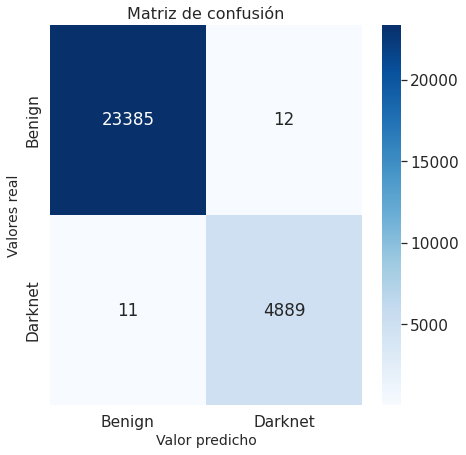

In [62]:
#MATRIZ DE CONFUSION
# Configuramos el estilo de la tabla
sns.set(style='whitegrid', font_scale=1.4)

# Creamos la tabla con colores
fig, ax = plt.subplots(figsize=(7, 7))
ax = sns.heatmap(cm_tree, annot=True, cmap='Blues', fmt='g', cbar=True)

# Configuramos los títulos y etiquetas
ax.set_xlabel('Valor predicho', fontsize=14)
ax.set_ylabel('Valores real', fontsize=14)
ax.set_title('Matriz de confusión', fontsize=16)
ax.xaxis.set_ticklabels(['Benign', 'Darknet'])
ax.yaxis.set_ticklabels(['Benign', 'Darknet'])

plt.show()

**RANDOM FOREST**

In [63]:
from sklearn.ensemble import RandomForestClassifier
#RANDOM FOREST 
# Creamos el Random Forest
rf = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=50,
                            min_samples_split=2, min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, max_features='sqrt', 
                            max_leaf_nodes=None, min_impurity_decrease=0.0, 
                            bootstrap=True, oob_score=False, n_jobs=None, 
                            random_state=50, verbose=0, warm_start=False, 
                            class_weight=None, ccp_alpha=0.0, max_samples=None)


# Entrenamos el modelo
rf.fit(x_train_smote, y_train_smote)

# Predecimos el modelo
y_pred_test_rf = rf.predict(x_test)

Medidas de error/precisión

In [64]:
accuracy_test = accuracy_score(y_test, y_pred_test_rf)
precision_test = precision_score(y_test, y_pred_test_rf)
recall_test = recall_score(y_test, y_pred_test_rf)
f1_test = f1_score(y_test, y_pred_test_rf)
roc_auc_test = roc_auc_score(y_test, y_pred_test_rf)

print("Accuracy: {:.3f}".format(accuracy_test))
print("Precision: {:.3f}".format(precision_test))
print("Recall: {:.3f}".format(recall_test))
print("F1-score: {:.3f}".format(f1_test))
print("ROC AUC: {:.3f}".format(roc_auc_test))
print(classification_report(y_pred_test_rf, y_test))
cm_rf = confusion_matrix(y_test, y_pred_test_rf)

Accuracy: 0.999
Precision: 0.999
Recall: 0.996
F1-score: 0.998
ROC AUC: 0.998
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23414
           1       1.00      1.00      1.00      4883

    accuracy                           1.00     28297
   macro avg       1.00      1.00      1.00     28297
weighted avg       1.00      1.00      1.00     28297



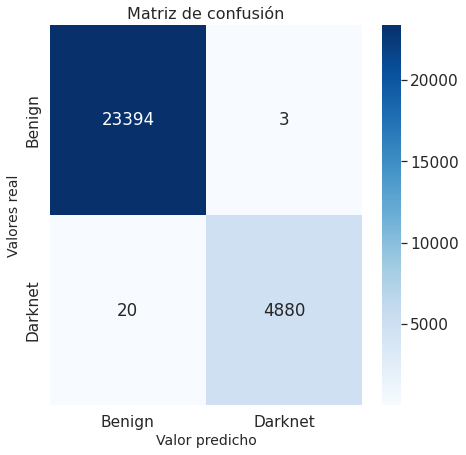

In [65]:
#MATRIZ DE CONFUSION
# Configuramos el estilo de la tabla
sns.set(style='whitegrid', font_scale=1.4)

# Creamos la tabla con colores
fig, ax = plt.subplots(figsize=(7, 7))
ax = sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='g', cbar=True)

# Configuramos los títulos y etiquetas
ax.set_xlabel('Valor predicho', fontsize=14)
ax.set_ylabel('Valores real', fontsize=14)
ax.set_title('Matriz de confusión', fontsize=16)
ax.xaxis.set_ticklabels(['Benign', 'Darknet'])
ax.yaxis.set_ticklabels(['Benign', 'Darknet'])

plt.show()

**KNN-K-Nearest Neighbors**

In [66]:
from sklearn.neighbors import KNeighborsClassifier
# KNN
# Creamos el modelo de KNN
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', 
                           leaf_size=30, p=2, metric='minkowski', 
                           metric_params=None, n_jobs=None)

# Entrenamos el modelo
knn.fit(x_train_smote, y_train_smote)

#Predecimos el modelo
y_pred_test_knn = knn.predict(x_test)

Medidas de error/precisión

In [67]:
accuracy_test = accuracy_score(y_test, y_pred_test_knn)
precision_test = precision_score(y_test, y_pred_test_knn)
recall_test = recall_score(y_test, y_pred_test_knn)
f1_test = f1_score(y_test, y_pred_test_knn)
roc_auc_test = roc_auc_score(y_test, y_pred_test_knn)

print("Accuracy: {:.3f}".format(accuracy_test))
print("Precision: {:.3f}".format(precision_test))
print("Recall: {:.3f}".format(recall_test))
print("F1-score: {:.3f}".format(f1_test))
print("ROC AUC: {:.3f}".format(roc_auc_test))
print(classification_report(y_pred_test_knn, y_test))
cm_knn = confusion_matrix(y_test, y_pred_test_knn)

Accuracy: 0.895
Precision: 0.642
Recall: 0.885
F1-score: 0.744
ROC AUC: 0.891
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     21541
           1       0.89      0.64      0.74      6756

    accuracy                           0.89     28297
   macro avg       0.89      0.81      0.84     28297
weighted avg       0.89      0.89      0.89     28297



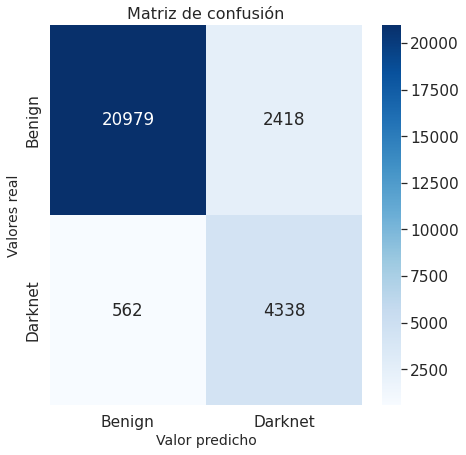

In [68]:
#MATRIZ DE CONFUSION
# Configuramos el estilo de la tabla
sns.set(style='whitegrid', font_scale=1.4)

# Creamos la tabla con colores
fig, ax = plt.subplots(figsize=(7, 7))
ax = sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='g', cbar=True)

# Configuramos los títulos y etiquetas
ax.set_xlabel('Valor predicho', fontsize=14)
ax.set_ylabel('Valores real', fontsize=14)
ax.set_title('Matriz de confusión', fontsize=16)
ax.xaxis.set_ticklabels(['Benign', 'Darknet'])
ax.yaxis.set_ticklabels(['Benign', 'Darknet'])

plt.show()

**MultiLayer Perceptron (MLP)**

In [69]:
from sklearn.neural_network import MLPClassifier
# MLP
# Creamos el modelo de MLP
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation='relu', 
                    solver='adam', alpha=0.0001, batch_size='auto', 
                    learning_rate='constant', learning_rate_init=0.001, 
                    power_t=0.5, max_iter=200, shuffle=True, random_state=None, 
                    tol=0.0001, verbose=False, warm_start=False, momentum=0.9, 
                    nesterovs_momentum=True, early_stopping=False, 
                    validation_fraction=0.1, beta_1=0.9, beta_2=0.999, 
                    epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

# Entrenamos el modelo
mlp.fit(x_train_smote, y_train_smote)

#Predecimos el modelo
y_pred_test_mlp = mlp.predict(x_test)

Medidas de error/precision

In [70]:
accuracy_test = accuracy_score(y_test, y_pred_test_mlp)
precision_test = precision_score(y_test, y_pred_test_mlp)
recall_test = recall_score(y_test, y_pred_test_mlp)
f1_test = f1_score(y_test, y_pred_test_mlp)
roc_auc_test = roc_auc_score(y_test, y_pred_test_mlp)

print("Accuracy: {:.3f}".format(accuracy_test))
print("Precision: {:.3f}".format(precision_test))
print("Recall: {:.3f}".format(recall_test))
print("F1-score: {:.3f}".format(f1_test))
print("ROC AUC: {:.3f}".format(roc_auc_test))
print(classification_report(y_pred_test_mlp, y_test))
cm_mlp = confusion_matrix(y_test, y_pred_test_mlp)

Accuracy: 0.932
Precision: 0.975
Recall: 0.621
F1-score: 0.759
ROC AUC: 0.809
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     25176
           1       0.62      0.98      0.76      3121

    accuracy                           0.93     28297
   macro avg       0.81      0.95      0.86     28297
weighted avg       0.96      0.93      0.94     28297



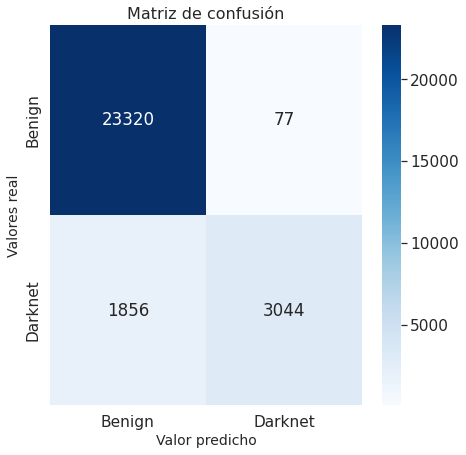

In [71]:
#MATRIZ DE CONFUSION
# Configuramos el estilo de la tabla
sns.set(style='whitegrid', font_scale=1.4)

# Creamos la tabla con colores
fig, ax = plt.subplots(figsize=(7, 7))
ax = sns.heatmap(cm_mlp, annot=True, cmap='Blues', fmt='g', cbar=True)

# Configuramos los títulos y etiquetas
ax.set_xlabel('Valor predicho', fontsize=14)
ax.set_ylabel('Valores real', fontsize=14)
ax.set_title('Matriz de confusión', fontsize=16)
ax.xaxis.set_ticklabels(['Benign', 'Darknet'])
ax.yaxis.set_ticklabels(['Benign', 'Darknet'])

plt.show()

**Boxplot *ACCURACY* 5 Modelos**

Realizamosel boxplot del ACCURACY ESTIMADO por VALIDACION CRUZADA 10x10 fold

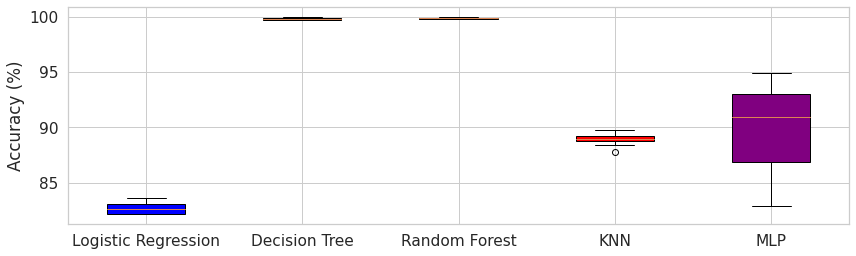

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold

modelos = [lr, tree, rf, knn, mlp]

# Definir colores para cada modelo
colores = ['blue', 'orange', 'green', 'red', 'purple']

# Definir validación cruzada 10x10-fold
cv = KFold(n_splits=10, shuffle=True, random_state=1)

# Realizar validación cruzada y guardar las precisiones estimadas
scores = []
for modelo in modelos:
    score = cross_val_score(modelo, x_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
    scores.append(score * 100)

# Crear el boxplot
box = plt.boxplot(scores, patch_artist=True)

# Agregar etiquetas de los ejes y título
plt.ylabel('Accuracy (%)')

# Agregar etiquetas de los modelos en el eje x
labels = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'MLP' ]
plt.xticks(np.arange(1, len(labels) + 1), labels)

# Agregar colores a los modelos en el boxplot
for patch, color in zip(box['boxes'], colores):
    patch.set_facecolor(color)

# Mostrar el gráfico
plt.show()

**Boxplot *ACCURACY* (2 mejores modelos)**

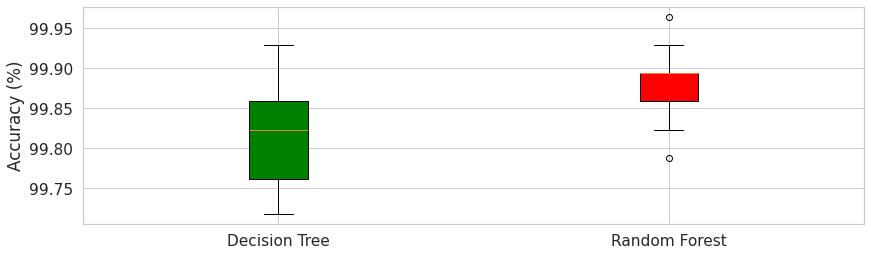

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold

modelos = [tree, rf]

# Definir colores para cada modelo
colores = ['green', 'red']

# Definir validación cruzada 10x10-fold
cv = KFold(n_splits=10, shuffle=True, random_state=1)

# Realizar validación cruzada y guardar las precisiones estimadas
scores = []
for modelo in modelos:
    score = cross_val_score(modelo, x_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
    scores.append(score * 100)

# Crear el boxplot
box = plt.boxplot(scores, patch_artist=True)

# Agregar etiquetas de los ejes y título
plt.ylabel('Accuracy (%)')

# Agregar etiquetas de los modelos en el eje x
labels = ['Decision Tree', 'Random Forest']
plt.xticks(np.arange(1, len(labels) + 1), labels)

# Agregar colores a los modelos en el boxplot
for patch, color in zip(box['boxes'], colores):
    patch.set_facecolor(color)

# Mostrar el gráfico
plt.show()

**Boxplot *RECALL* 5 Modelos**

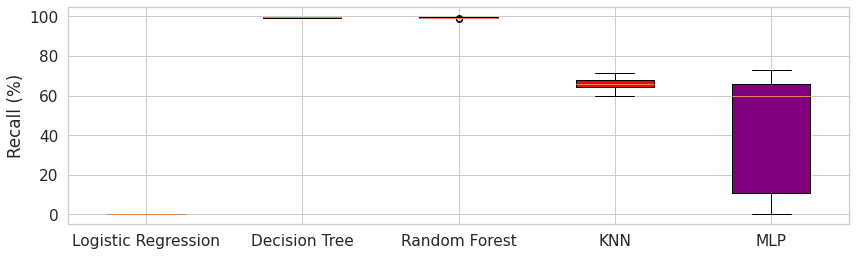

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold

modelos = [lr, tree, rf, knn, mlp]

# Definir colores para cada modelo
colores = ['blue', 'orange', 'green', 'red', 'purple']

# Definir validación cruzada 10x10-fold
cv = KFold(n_splits=10, shuffle=True, random_state=1)

# Realizar validación cruzada y guardar las precisiones estimadas
scores = []
for modelo in modelos:
    score = cross_val_score(modelo, x_test, y_test, scoring='recall', cv=cv, n_jobs=-1)
    scores.append(score * 100)

# Crear el boxplot
box = plt.boxplot(scores, patch_artist=True)

# Agregar etiquetas de los ejes y título
plt.ylabel('Recall (%)')

# Agregar etiquetas de los modelos en el eje x
labels = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'MLP' ]
plt.xticks(np.arange(1, len(labels) + 1), labels)

# Agregar colores a los modelos en el boxplot
for patch, color in zip(box['boxes'], colores):
    patch.set_facecolor(color)

# Mostrar el gráfico
plt.show()

**Boxplot *RECALL* (2mejores modelos)**

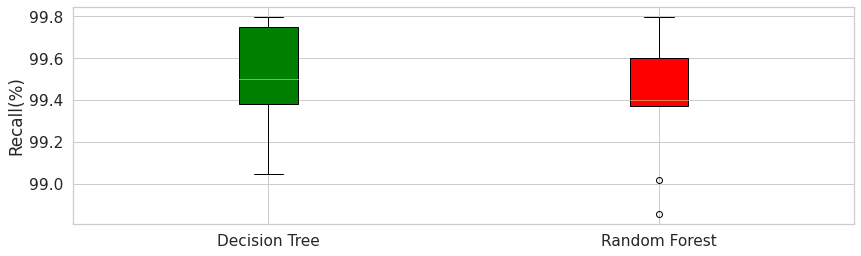

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold

modelos = [tree, rf]

# Definir colores para cada modelo
colores = ['green', 'red']

# Definir validación cruzada 10x10-fold
cv = KFold(n_splits=10, shuffle=True, random_state=1)

# Realizar validación cruzada y guardar las precisiones estimadas
scores = []
for modelo in modelos:
    score = cross_val_score(modelo, x_test, y_test, scoring='recall', cv=cv, n_jobs=-1)
    scores.append(score * 100)

# Crear el boxplot
box = plt.boxplot(scores, patch_artist=True)

# Agregar etiquetas de los ejes y título
plt.ylabel('Recall(%)')

# Agregar etiquetas de los modelos en el eje x
labels = ['Decision Tree', 'Random Forest']
plt.xticks(np.arange(1, len(labels) + 1), labels)

# Agregar colores a los modelos en el boxplot
for patch, color in zip(box['boxes'], colores):
    patch.set_facecolor(color)

# Mostrar el gráfico
plt.show()

**DEEP NEURAL NETWORK** (DL) 

Vamos a definir 5 layers, con cada capa con capacidad para 128 neuronas. Por tanto tendremos la primera capa de entrada, 3 hidden layers (capas ocultas) y la capa de salida (output) 

In [73]:
#Importamos las librerías de Keras para el modelo y crear las layers
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.regularizers import l1_l2
from keras.layers import Dropout


In [74]:
#Creamos nuestro modelo de Red Neuronal

model = Sequential()

# capa de entrada
model.add(Dense(128, input_dim=x_train.shape[1], activation='relu', 
                kernel_regularizer =l1_l2(1e-5, 1e-4)))
model.add(BatchNormalization())
# hidden layer 1
model.add(Dense(128, activation='relu', 
                kernel_regularizer =l1_l2(1e-5, 1e-4)))
model.add(BatchNormalization())
# hidden layer 2
model.add(Dense(128, activation='relu',
                kernel_regularizer =l1_l2(1e-5, 1e-4)))
model.add(BatchNormalization())
# hidden layer 3
model.add(Dense(128, activation='relu',
                kernel_regularizer =l1_l2(1e-5, 1e-4)))
model.add(BatchNormalization())
# capa de salida con la funcion de activacion sigmoid para que la salida sea entre 0 y 1
model.add(Dense(1, activation='sigmoid',
                kernel_regularizer =l1_l2(1e-5, 1e-4)))
model.add(BatchNormalization())

# compilar modelo
model.compile(loss='mean_squared_error', optimizer='adagrad', metrics=['accuracy'])

Como obtenemos valores de loss grandes, implementamos un Learning Rate Scheduler con la función Coseno 

In [75]:
from keras.callbacks import LearningRateScheduler
import math

#Función de schedule basada en la función cosine
def cosine_schedule(epoch, lr):
    lr_max = 0.1
    lr_min = 0.001
    n_epochs = 100
    cos = (1 + math.cos(math.pi * epoch / n_epochs)) / 2
    lr = lr_min + cos * (lr_max - lr_min)
    return lr

#Callback LearningRateScheduler funcion Coseno
lr_scheduler = LearningRateScheduler(cosine_schedule)

Epoch 1/150
885/885 [==============================] - 10s 9ms/step - loss: 0.2225 - accuracy: 0.8275 - val_loss: 0.2734 - val_accuracy: 0.7960 - lr: 0.1000
Epoch 2/150
885/885 [==============================] - 9s 10ms/step - loss: 0.1971 - accuracy: 0.8410 - val_loss: 0.2548 - val_accuracy: 0.7599 - lr: 0.1000
Epoch 3/150
885/885 [==============================] - 8s 9ms/step - loss: 0.1851 - accuracy: 0.8450 - val_loss: 0.1829 - val_accuracy: 0.8405 - lr: 0.0999
Epoch 4/150
885/885 [==============================] - 7s 8ms/step - loss: 0.1751 - accuracy: 0.8454 - val_loss: 0.1927 - val_accuracy: 0.8159 - lr: 0.0998
Epoch 5/150
885/885 [==============================] - 9s 10ms/step - loss: 0.1653 - accuracy: 0.8459 - val_loss: 0.2152 - val_accuracy: 0.7643 - lr: 0.0996
Epoch 6/150
885/885 [==============================] - 7s 8ms/step - loss: 0.1579 - accuracy: 0.8468 - val_loss: 0.1936 - val_accuracy: 0.7910 - lr: 0.0994
Epoch 7/150
885/885 [==============================] - 9s 10m

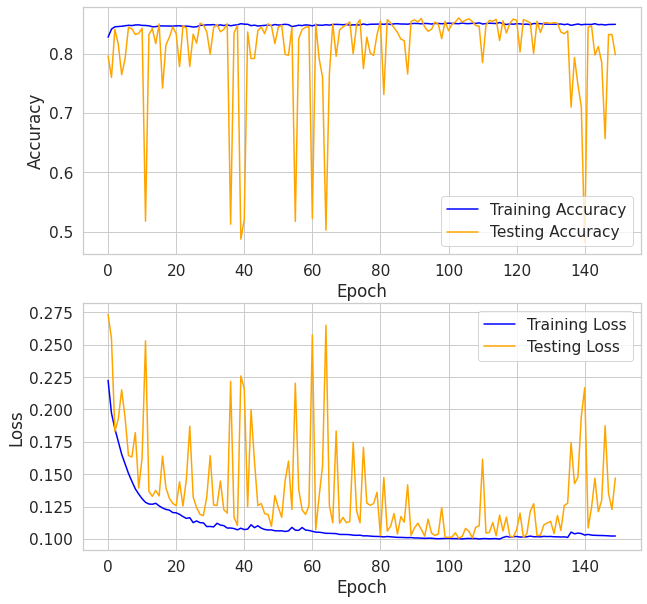

In [76]:
import matplotlib.pyplot as plt

# Entrenamos el modelo
history= model.fit(x_train, y_train, epochs=150, batch_size=128, 
                   callbacks=[lr_scheduler], validation_data=(x_test, y_test))

accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']
loss = history.history['loss']
test_loss = history.history['val_loss']


#Gráfica del ACCURACY y el LOSS en cada epoch
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
axs[0].plot(accuracy, color='blue', label='Training Accuracy')
axs[0].plot(test_accuracy, color='orange', label='Testing Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend(loc='lower right')
axs[1].plot(loss, color='blue', label='Training Loss')
axs[1].plot(test_loss, color='orange', label='Testing Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend(loc='upper right')
plt.show()

In [79]:
#Evaluamos el modelo
scores = model.evaluate(x_test, y_test)

print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

885/885 [==============================] - 2s 3ms/step - loss: 0.1471 - accuracy: 0.7979
Loss: 0.147
Accuracy: 0.798
